In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')


# import glob

# folder_path = 'data'  
# file_type = 'xlsx'  
# files = glob.glob(f"{folder_path}/*.{file_type}")


# all_data = []
# for file in files:
#     df = pd.read_excel(file)
#     all_data.append(df)

# combined_df = pd.concat(all_data, ignore_index=True)



# combined_df.to_csv('combined_data.csv', index=False)

df = pd.read_excel('WFF Shipping Data.xlsx')
data = df.copy()

## EDA

In [2]:
df.head()

,Id,Warehouse,Location,Sku,VendorName,ProductName,ProductId,AdjustmentType,AdjustmentQty,Virtual,...,ContainerType,TagLocation,User,LotNumber,ExpirationDate,Attribute,ReferenceId,Comments,Created,Updated
0,58332213,White Flower Farm,TORR-PACK-0-0-0-0-3,3038171-S,White Flower Farm,JAN BULB CONT,250576,Ship,1,0,...,OrderCarton,NaN,Rene.Azcona@localhost,NaN,NaN,NaN,NaN,Load carton 0000000005154801,1/12/2024 12:36:15 PM,1/12/2024 12:36:15 PM
1,58332214,White Flower Farm,TORR-PACK-0-0-0-0-14,3038171-S,White Flower Farm,JAN BULB CONT,250576,Ship,1,0,...,OrderCarton,NaN,Rene.Azcona@localhost,NaN,NaN,NaN,NaN,Load carton 0000000005154967,1/12/2024 12:36:17 PM,1/12/2024 12:36:17 PM
2,58332223,White Flower Farm,TORR-PACK-0-0-0-0-3,3038171-S,White Flower Farm,JAN BULB CONT,250576,Ship,1,0,...,OrderCarton,NaN,Rene.Azcona@localhost,NaN,NaN,NaN,NaN,Load carton 0000000005154804,1/12/2024 12:36:29 PM,1/12/2024 12:36:29 PM
3,58332226,White Flower Farm,TORR-PACK-0-0-0-0-13,3038171-S,White Flower Farm,JAN BULB CONT,250576,Ship,1,0,...,OrderCarton,NaN,Rene.Azcona@localhost,NaN,NaN,NaN,NaN,Load carton 0000000005154831,1/12/2024 12:36:32 PM,1/12/2024 12:36:32 PM
4,58332237,White Flower Farm,TORR-PACK-0-0-0-0-41,0056573-A,White Flower Farm,Solar Globe Lantern - Lg mtlc blue,244849,Ship,1,0,...,OrderCarton,NaN,cfollert@whiteflowerfarm.com,NaN,NaN,NaN,NaN,Load carton 0000000005150969,1/12/2024 12:36:40 PM,1/12/2024 12:36:40 PM


In [3]:
df.shape

(398485, 29)

In [4]:
df.columns

Index(['Id', 'Warehouse', 'Location', 'Sku', 'VendorName', 'ProductName',
       'ProductId', 'AdjustmentType', 'AdjustmentQty', 'Virtual', 'Stock',
       'Fulfillable', 'Reserved', 'Unscannable', 'Damaged', 'Missing',
       'ExternalOrderId', 'AsnNumber', 'CaseNumber', 'ContainerType',
       'TagLocation', 'User', 'LotNumber', 'ExpirationDate', 'Attribute',
       'ReferenceId', 'Comments', 'Created', 'Updated'],
      dtype='object')

In [5]:
step_size = 10


for start in range(0, df.shape[1], step_size):
    end = start + step_size

    print(f"Columns {start} to {min(end, df.shape[1])}:")
    display(df.iloc[:, start:end].head(3))
#     print(df.iloc[:, start:end].head(3))

Columns 0 to 10:


,Id,Warehouse,Location,Sku,VendorName,ProductName,ProductId,AdjustmentType,AdjustmentQty,Virtual
0,58332213,White Flower Farm,TORR-PACK-0-0-0-0-3,3038171-S,White Flower Farm,JAN BULB CONT,250576,Ship,1,0
1,58332214,White Flower Farm,TORR-PACK-0-0-0-0-14,3038171-S,White Flower Farm,JAN BULB CONT,250576,Ship,1,0
2,58332223,White Flower Farm,TORR-PACK-0-0-0-0-3,3038171-S,White Flower Farm,JAN BULB CONT,250576,Ship,1,0


Columns 10 to 20:


,Stock,Fulfillable,Reserved,Unscannable,Damaged,Missing,ExternalOrderId,AsnNumber,CaseNumber,ContainerType
0,0,0,0,0,0,0,VC1113-9002114-5912010-4,NaN,0000000005154801,OrderCarton
1,0,0,0,0,0,0,VC1113-9002291-5933763-2,NaN,0000000005154967,OrderCarton
2,0,0,0,0,0,0,VC1113-9002019-5881772-8,NaN,0000000005154804,OrderCarton


Columns 20 to 29:


,TagLocation,User,LotNumber,ExpirationDate,Attribute,ReferenceId,Comments,Created,Updated
0,NaN,Rene.Azcona@localhost,NaN,NaN,NaN,NaN,Load carton 0000000005154801,1/12/2024 12:36:15 PM,1/12/2024 12:36:15 PM
1,NaN,Rene.Azcona@localhost,NaN,NaN,NaN,NaN,Load carton 0000000005154967,1/12/2024 12:36:17 PM,1/12/2024 12:36:17 PM
2,NaN,Rene.Azcona@localhost,NaN,NaN,NaN,NaN,Load carton 0000000005154804,1/12/2024 12:36:29 PM,1/12/2024 12:36:29 PM


In [6]:
for d in df.columns:
    print(d)
    print(df[d].nunique())
    print(df[d].unique())
    print()


Id
398485
[58332213 58332214 58332223 ... 54424816 54424817 54424818]

Warehouse
1
['White Flower Farm']

Location
40
['TORR-PACK-0-0-0-0-3' 'TORR-PACK-0-0-0-0-14' 'TORR-PACK-0-0-0-0-13'
 'TORR-PACK-0-0-0-0-41' 'TORR-PACK-0-0-0-0-11' 'BROAD-BPACK-0-0-0-0-P50'
 'TORR-PACK-0-0-0-0-19' 'TORR-PACK-0-0-0-0-12' 'TORR-PACK-0-0-0-0-5'
 'TORR-PACK-0-0-0-0-22' 'TORR-PACK-0-0-0-0-9' 'TORR-PACK-0-0-0-0-40'
 'TORR-HOSP-0-0-0-0-H5' 'TORR-HOSP-0-0-0-0-H19' 'TORR-PACK-0-0-0-0-10'
 'TORR-HOSP-0-0-0-0-H41' 'TORR-HOSP-0-0-0-0-H11' 'TORR-PACK-0-0-0-0-8'
 'TORR-HOSP-0-0-0-0-H7' 'TORR-HOSP-0-0-0-0-H8' 'TORR-PACK-0-0-0-0-7'
 'TORR-PACK-0-0-0-0-20' 'TORR-PACK-0-0-0-0-1' 'TORR-HOSP-0-0-0-0-H40'
 'TORR-HOSP-0-0-0-0-H2' 'TORR-PACK-0-0-0-0-2' 'TORR-PACK-0-0-0-0-21'
 'TORR-PACK-0-0-0-0-23' 'TORR-HOSP-0-0-0-0-H50' 'TORR-PACK-0-0-0-0-4'
 'TORR-PACK-0-0-0-0-6' 'TORR-PACK-0-0-0-0-17' 'TORR-PACK-0-0-0-0-15'
 'TORR-PACK-0-0-0-0-16' 'TORR-PACK-0-0-0-0-26' 'TORR-PACK-0-0-0-0-25'
 'TORR-PACK-0-0-0-0-24' 'TORR-SHRUB-0-0-0-0

In [8]:
df = df[['Sku', 'Created', 'Quantity']]
# df_models = df[['Sku', 'Created', 'AdjustmentQty']].rename(columns={'AdjustmentQty': 'Quantity'})
df_cleaned = df.copy()
df_cleaned

,Sku,Created,Quantity
0,3038171-S,2024-01-12 12:36:15,1
1,3038171-S,2024-01-12 12:36:17,1
2,3038171-S,2024-01-12 12:36:29,1
3,3038171-S,2024-01-12 12:36:32,1
4,0056573-A,2024-01-12 12:36:40,1
...,...,...,...
398480,0210102-F,2023-10-11 12:39:18,12
398481,0110521-F,2023-10-11 12:39:18,12
398482,0230750-F,2023-10-11 12:39:18,12
398483,0113108-F,2023-10-11 12:39:18,6


In [9]:
min_date = df_cleaned['Created'].min()
max_date = df_cleaned['Created'].max()

print("Minimum Date:", min_date)
print("Maximum Date:", max_date)

Minimum Date: 2023-09-22 14:57:20
Maximum Date: 2024-05-14 13:21:10


In [10]:
df['Created'] = pd.to_datetime(df['Created'])
grouped_data = df.groupby('Sku')['Quantity'].sum().reset_index()

print(grouped_data)

            Sku  Quantity
0     0003705-S        34
1     0003708-S       139
2     0003710-S       227
3     0003711-S        67
4     0003714-S        85
...         ...       ...
3212  C357852-A        97
3213  C358991-A       217
3214  C457852-A       101
3215  L058141-A      2134
3216  PT10156-A        22

[3217 rows x 2 columns]


In [11]:
df_cleaned.Sku.value_counts()

Sku
0058991-A    16332
0058990-A     4889
0043121-X     4171
0056208-A     3099
86762NP-X     2978
             ...  
0050278-A        1
0032179-F        1
0037628-F        1
0051049-A        1
0051176-A        1
Name: count, Length: 3217, dtype: int64

In [20]:
grouped_data.to_csv("models/sku_data.csv", index=False)

In [21]:
pd.read_csv("WFF_sku/0003705-S.csv")

,Sku,Created,AdjustmentQty
0,0003705-S,2024-05-13 06:49:29,1
1,0003705-S,2024-05-08 08:48:58,1
2,0003705-S,2024-05-09 07:40:08,1
3,0003705-S,2024-05-09 11:37:34,2
4,0003705-S,2024-05-07 07:57:42,1
5,0003705-S,2024-05-02 13:43:01,1
6,0003705-S,2024-04-30 07:25:10,2
7,0003705-S,2024-05-01 08:54:03,3
8,0003705-S,2024-04-24 07:42:37,1
9,0003705-S,2024-04-24 11:33:34,1


In [22]:
import os
import pandas as pd


directory = 'WFF_sku'
if not os.path.exists(directory):
    os.makedirs(directory)

# Group by 'Sku' and process each group
for sku, group in df.groupby('Sku'):
    # Create a DataFrame variable for each Sku
    globals()[f'df_{sku}'] = group

    # Save each DataFrame to a CSV file named after the Sku in the 'WFF_sku' folder
    file_path = os.path.join(directory, f'{sku}.csv')
    group.to_csv(file_path, index=False)

### Visualizations

In [23]:
# from statsmodels.tsa.seasonal import seasonal_decompose

# # Ensure your DataFrame is indexed by datetime
# df.index = df['Created']  
# df = df.sort_index()

# # Decomposing time series
# result = seasonal_decompose(df['Quantity'], model='additive', period=12)  # Period depends on data frequency
# result.plot()
# plt.show()


# from statsmodels.tsa.stattools import adfuller

# result = adfuller(df['Quantity'])
# print('ADF Statistic: %f' % result[0])
# print('p-value: %f' % result[1])


# from statsmodels.tsa.statespace.sarimax import SARIMAX

# # Example: SARIMA model
# model = SARIMAX(df['Quantity'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
# results = model.fit()

# df['forecast'] = results.predict(start='2024-01-01', end='2024-12-01', dynamic=True)
# df[['Quantity', 'forecast']].plot()
# plt.show()


# fig, ax = plt.subplots(figsize=(10, 5))
# df['Quantity'].plot(ax=ax, label='Actual')
# df['forecast'].plot(ax=ax, label='Forecast')
# plt.title('Forecast vs Actuals')
# plt.xlabel('Month')
# plt.ylabel('Total Quantity')
# plt.legend()
# plt.grid(True)
# plt.show()


In [27]:
print(df)

              Sku             Created  Quantity
0       3038171-S 2024-01-12 12:36:15         1
1       3038171-S 2024-01-12 12:36:17         1
2       3038171-S 2024-01-12 12:36:29         1
3       3038171-S 2024-01-12 12:36:32         1
4       0056573-A 2024-01-12 12:36:40         1
...           ...                 ...       ...
398480  0210102-F 2023-10-11 12:39:18        12
398481  0110521-F 2023-10-11 12:39:18        12
398482  0230750-F 2023-10-11 12:39:18        12
398483  0113108-F 2023-10-11 12:39:18         6
398484  0111602-F 2023-10-11 12:39:18         6

[398485 rows x 3 columns]


In [28]:
df['Month'] = df['Created'].dt.to_period('M')
df['Week'] = df['Created'].dt.to_period('W')

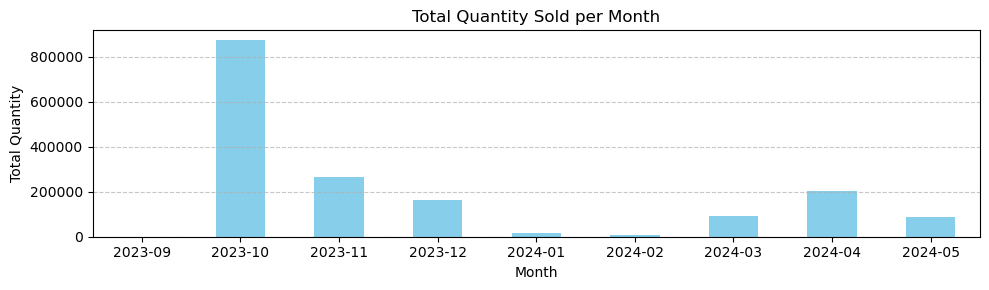

In [34]:
# Group by 'Month' and sum 'Quantity'
monthly_quantity = df.groupby('Month')['Quantity'].sum()

import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(10, 3))
monthly_quantity.plot(kind='bar', color='skyblue')
plt.title('Total Quantity Sold per Month')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.xticks(rotation=0)  # Keep the month labels horizontal for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


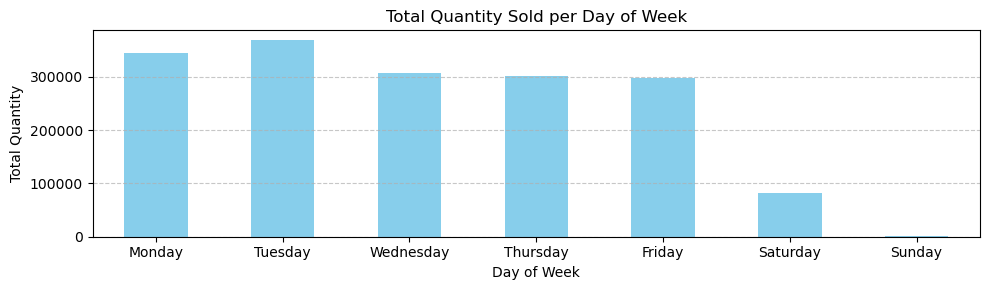

In [33]:
import matplotlib.pyplot as plt

# Ensure 'Created' column is in datetime format
df['Created'] = pd.to_datetime(df['Created'])

# Extract the day of the week (e.g., 'Mon', 'Tue', etc.)
df['DayOfWeek'] = df['Created'].dt.day_name()

# Define the correct order for days of the week
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['DayOfWeek'] = pd.Categorical(df['DayOfWeek'], categories=weekdays, ordered=True)

# Group by 'DayOfWeek' and sum 'Quantity'
weekly_quantity = df.groupby('DayOfWeek')['Quantity'].sum()

# Create a bar plot
plt.figure(figsize=(10, 3))
weekly_quantity.plot(kind='bar', color='skyblue')
plt.title('Total Quantity Sold per Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Quantity')
plt.xticks(rotation=0)  # Keep the day labels horizontal for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
wdefr

### Models

note: model with a lower RMSE or MAE and a higher R^2 is generally considered better.

1. Mean Squared Error (MSE)
Definition: MSE is the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual values.
What It Tells You:
Error Magnitude: A high MSE indicates a large error magnitude, suggesting poor model performance. A low MSE indicates the model predictions are close to the actual data points.
Sensitive to Outliers: Because the errors are squared, MSE is very sensitive to outliers. Large errors have disproportionately large effects on MSE, making it a good metric to check for outlier influence.
2. Root Mean Squared Error (RMSE)
Definition: RMSE is the square root of the mean of the squared errors. It converts the units back to the original units of the output variable, making it more interpretable than MSE.
What It Tells You:
Error Standard: RMSE provides a standard for the deviations of prediction errors. Lower values of RMSE indicate better fit.
Scale Interpretability: Because RMSE is in the same units as the response variable, it's easier to understand in the context of the data.
3. Mean Absolute Error (MAE)
Definition: MAE measures the average magnitude of the errors in a set of predictions, without considering their direction (i.e., without squaring).
What It Tells You:
Average Error: Gives a linear score of the average prediction error. One unit of MAE corresponds directly to one unit of error on the same scale as the data.
Robustness to Outliers: Unlike MSE, MAE is not as sensitive to outliers since it does not square the error values. It provides a more robust error measure in the presence of outliers.
4. R-squared (R^2)
Definition: R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination.
What It Tells You:
Explanatory Power: It indicates the percentage of the response variable variation that is explained by a linear model. An R^2 of 1 indicates that the regression predictions perfectly fit the data.
Comparative Metric: While R^2 alone cannot tell if the predictions are unbiased, high R^2 values generally indicate better model performance. However, it can be misleading as it will always increase as more predictors are added to the model, regardless of their validity.

## MLs (Not tuned)

In [ ]:
import os
directory = 'WFF_sku'

df_dict = {}


for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)

        sku = filename.replace('.csv', '')
        df = pd.read_csv(file_path)
        df_dict[sku] = df


In [ ]:
import pandas as pd
import os

# Directory containing the CSV files
directory = 'WFF_sku'

# Initialize an empty DataFrame to store summary results
summary_df = pd.DataFrame()

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        # Construct the full file path
        file_path = os.path.join(directory, filename)
        
        # Load the DataFrame from CSV file
        df = pd.read_csv(file_path)
        
        # Get the count of non-null values in each column
        non_null_counts = df.count()
        
        # Prepare a DataFrame for the current file's non-null counts
        count_df = pd.DataFrame(non_null_counts).transpose()
        count_df['Filename'] = filename  # Add filename to the DataFrame
        
        # Append the counts DataFrame to the summary DataFrame
        summary_df = pd.concat([summary_df, count_df], ignore_index=True)

# Optionally, save the summary DataFrame to a CSV file
summary_csv_path = 'WFF_sku/summary_counts.csv'
summary_df.to_csv('models/summary_csv_path', index=False)

# Display the summary DataFrame
print(summary_df)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from catboost import CatBoostRegressor
import joblib

def process_and_evaluate_models(df, sku):
    if 'Created' not in df.columns:
        print(f"No 'Created' column found for SKU {sku}. Skipping...")
        return pd.DataFrame()
    
    df['Created'] = pd.to_datetime(df['Created'])
    df.set_index('Created', inplace=True)
    aggregated_data = df.groupby([pd.Grouper(freq='D')])['Quantity'].sum().reset_index()
    aggregated_data['DayOfWeek'] = aggregated_data['Created'].dt.dayofweek
    aggregated_data['Month'] = aggregated_data['Created'].dt.month

    features = ['DayOfWeek', 'Month']
    X = aggregated_data[features]
    y = aggregated_data['Quantity']
    
    if len(X) < 2:
        print(f"Not enough data to train and test for SKU {sku}.")
        return pd.DataFrame()

    split_point = int(len(X) * 0.8)
    X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
    y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]
    
    if len(X_train) == 0 or len(X_test) == 0:
        print(f"Empty train or test set for SKU {sku}.")
        return pd.DataFrame()

    models = [
        ('Linear Regression', LinearRegression()),
        ('Ridge', Ridge()),
        ('Lasso', Lasso()),
        ('Elastic Net', ElasticNet()),
        ('SVR', SVR()),
        ('Decision Tree', DecisionTreeRegressor()),
        ('Random Forest', RandomForestRegressor()),
        ('Gradient Boosting', GradientBoostingRegressor()),
        ('XGBoost', xgb.XGBRegressor(objective='reg:squarederror')),
        ('CatBoost', CatBoostRegressor(verbose=0))
    ]

    results = pd.DataFrame(columns=['SKU', 'Model', 'MSE', 'RMSE', 'MAE', 'R2'])
    
    for name, model in models:
        try:
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
            mse = mean_squared_error(y_test, predictions)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_test, predictions)
            r2 = r2_score(y_test, predictions)
            
#  # Save each model
#             model_filename = f'{directory}/{sku}_best_model.pkl'
#             joblib.dump(model, model_filename)
        
        except Exception as e:
            print(f"Error training {name} for SKU {sku}: {e}")
            mse, rmse, mae, r2 = np.nan, np.nan, np.nan, np.nan  # Set error metrics as NaN

        result_df = pd.DataFrame([[sku, name, mse, rmse, mae, r2]], columns=['SKU', 'Model', 'MSE', 'RMSE', 'MAE', 'R2'])
        results = pd.concat([results, result_df], ignore_index=True)

    return results




In [ ]:
import os


directory = 'WFF_sku'

all_results = pd.DataFrame()

for filename in os.listdir(directory):
    if filename.endswith('.csv'):  
        file_path = os.path.join(directory, filename)   
        df = pd.read_csv(file_path)
        sku = filename.replace('.csv', '')
        results = process_and_evaluate_models(df, sku)
        all_results = pd.concat([all_results, results], ignore_index=True)


print(all_results)


all_results.to_csv('models/all_models_results.csv', index=False)
print("Models trained and saved successfully.")

In [ ]:
# import pandas as pd


# filtered_results = all_results[(all_results['MSE'] != 0) & (all_results['R2'] > 0)]

# # Function to select the model with the smallest MAE if MSE and R2 are valid
# # def select_best_model(df):
# #     return df.loc[df['MAE'].idxmin()]
# def select_best_model(df, metric):
#     """ Selects the best model based on a given metric. """
#     if metric.lower() == 'mse':
#         return df.loc[df['MSE'].idxmin()]
#     elif metric.lower() == 'rmse':
#         return df.loc[df['RMSE'].idxmin()]
#     elif metric.lower() == 'mae':
#         return df.loc[df['MAE'].idxmin()]
#     elif metric.lower() == 'r2':
#         return df.loc[df['R2'].idxmax()]  # Max because a higher R2 is better
#     else:
#         raise ValueError("Unsupported metric provided!")

# # Group by SKU, apply sorting and selection function
# best_models_mse = filtered_results.groupby('SKU').apply(select_best_model).reset_index(drop=True)
# best_models_mse.to_csv('models/best_models_per_sku_ML.csv', index=False)
# print(best_models_mse)



In [ ]:
import pandas as pd

filtered_results = all_results[(all_results['MSE'] != 0) & (all_results['R2'] > 0)]

def select_best_model(df, metric):
    """ Selects the best model based on a given metric. """
    if metric.lower() == 'mse':
        return df.loc[df['MSE'].idxmin()]
    elif metric.lower() == 'rmse':
        return df.loc[df['RMSE'].idxmin()]
    elif metric.lower() == 'mae':
        return df.loc[df['MAE'].idxmin()]
    elif metric.lower() == 'r2':
        return df.loc[df['R2'].idxmax()]  # Max because a higher R2 is better
    else:
        raise ValueError("Unsupported metric provided!")

# Group by SKU and apply model selection function
best_models_per_sku = filtered_results.groupby('SKU').apply(lambda x: select_best_model(x, 'mae')).reset_index(drop=True)

# Save the best models
best_models_per_sku.to_csv('models/best_models_per_sku.csv', index=False)
print(best_models_per_sku)


In [ ]:
pd.read_csv('models/best_models_per_sku_ML.csv')

## Models Tuned

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
# from sklearn.svm import SVR
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# import xgboost as xgb
# from catboost import CatBoostRegressor

# def process_and_evaluate_models(df, sku):
#     if 'Created' not in df.columns:
#         print(f"No 'Created' column found for SKU {sku}. Skipping...")
#         return pd.DataFrame()

#     df['Created'] = pd.to_datetime(df['Created'])
#     df.set_index('Created', inplace=True)
#     aggregated_data = df.groupby([pd.Grouper(freq='D')])['Quantity'].sum().reset_index()
#     aggregated_data['DayOfWeek'] = aggregated_data['Created'].dt.dayofweek
#     aggregated_data['Month'] = aggregated_data['Created'].dt.month

#     features = ['DayOfWeek', 'Month']
#     X = aggregated_data[features]
#     y = aggregated_data['Quantity']

#     if len(X) < 2:
#         print(f"Not enough data to train and test for SKU {sku}.")
#         return pd.DataFrame()

#     split_point = int(len(X) * 0.8)
#     X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
#     y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]

#     if len(X_train) == 0 or len(X_test) == 0:
#         print(f"Empty train or test set for SKU {sku}.")
#         return pd.DataFrame()

#     models = [
#         ('Linear Regression', LinearRegression()),
#         ('Ridge', Ridge()),
#         ('Lasso', Lasso()),
#         ('Elastic Net', ElasticNet()),
#         ('SVR', SVR()),
#         ('Decision Tree', DecisionTreeRegressor()),
#         ('Random Forest', RandomForestRegressor()),
#         ('Gradient Boosting', GradientBoostingRegressor()),
#         ('XGBoost', xgb.XGBRegressor(objective='reg:squarederror')),
#         ('CatBoost', CatBoostRegressor(verbose=0))
#     ]  
    
    
    
    
#     param_grid = {
#         'Ridge': {'alpha': [0.1, 1.0, 10.0]},
#         'Lasso': {'alpha': [0.001, 0.01, 0.1, 1, 10]},
#         'Elastic Net': {'alpha': [0.001, 0.01, 0.1, 1, 10], 'l1_ratio': [0.2, 0.5, 0.8]},
#         'SVR': {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']},
#         'Decision Tree': {'max_depth': [None, 10, 20]},
#         'Random Forest': {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]},
#         'Gradient Boosting': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7]},
#         'XGBoost': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7]},
#         'CatBoost': {'iterations': [100, 200], 'learning_rate': [0.01, 0.1], 'depth': [3, 5, 7]}
#     }

#     results = pd.DataFrame(columns=['SKU', 'Model', 'MSE', 'RMSE', 'MAE', 'R2'])

#     # Iterate through each model, applying GridSearchCV where applicable
#     for name, model in models:
#         if name in param_grid:
#             grid_search = GridSearchCV(estimator=model, param_grid=param_grid[name], cv=5, scoring='neg_mean_squared_error')
#             grid_search.fit(X_train, y_train)
#             best_model = grid_search.best_estimator_
#             predictions = best_model.predict(X_test)
#             mse = mean_squared_error(y_test, predictions)
#             rmse = np.sqrt(mse)
#             mae = mean_absolute_error(y_test, predictions)
#             r2 = r2_score(y_test, predictions)
#         else:
#             model.fit(X_train, y_train)
#             predictions = model.predict(X_test)
#             mse = mean_squared_error(y_test, predictions)
#             rmse = np.sqrt(mse)
#             mae = mean_absolute_error(y_test, predictions)
#             r2 = r2_score(y_test, predictions)

#         result_df = pd.DataFrame([[sku, name, mse, rmse, mae, r2]], columns=['SKU', 'Model', 'MSE', 'RMSE', 'MAE', 'R2'])
#         results = pd.concat([results, result_df], ignore_index=True)

#     return results


In [ ]:
# directory = 'WFF_sku'

# tuned_results = pd.DataFrame()

# for filename in os.listdir(directory):
#     if filename.endswith('.csv'):  
#         file_path = os.path.join(directory, filename)   
#         df = pd.read_csv(file_path)
#         sku = filename.replace('.csv', '')
#         results = process_and_evaluate_models(df, sku)
#         tuned_results = pd.concat([tuned_results, results], ignore_index=True)


# print(tuned_results)


# results.to_csv('models/tuned_models_results.csv', index=False)

## Traditional Models

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

def evaluate_model(predictions, y_test, model_name):
    if np.any(np.isnan(predictions)):
        return {'Model': model_name, 'MSE': np.nan, 'RMSE': np.nan, 'MAE': np.nan, 'R2': np.nan}
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return {
        'Model': model_name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

def process_file(file_path):
    df = pd.read_csv(file_path)
    if 'Created' not in df.columns or 'Quantity' not in df.columns:
        print(f"Missing required columns in {file_path}. Skipping...")
        return None

    df['Created'] = pd.to_datetime(df['Created'])
    df.set_index('Created', inplace=True)
    df = df.sort_index()

    # Handling missing data in Quantity
    df['Quantity'].fillna(method='ffill', inplace=True)
    df['Quantity'].fillna(method='bfill', inplace=True)

    if len(df) < 30:
        print(f"Not enough data in {file_path} to perform reliable time series analysis.")
        return None

    y = df['Quantity']
    split_point = int(len(y) * 0.8)
    y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]
    results = []

    # 1. Exponential Smoothing with trend and seasonality
    try:
        if y_train.isnull().any():
            raise ValueError("NaN values in training data")
        model_es = ExponentialSmoothing(y_train, trend="add", seasonal="add", seasonal_periods=12).fit()
        predictions_es = model_es.forecast(steps=len(y_test))
        results.append(evaluate_model(predictions_es, y_test, 'Exponential Smoothing w/ Trend & Seasonality'))
    except Exception as e:
        print(f"Error with Exponential Smoothing: {e}")
        results.append({'Model': 'Exponential Smoothing w/ Trend & Seasonality', 'MSE': np.nan, 'RMSE': np.nan, 'MAE': np.nan, 'R2': np.nan})


    # 2. Moving Average
    moving_avg = y_train.rolling(window=12).mean().iloc[-1]
    predictions_ma = np.full(len(y_test), moving_avg)
    results.append(evaluate_model(predictions_ma, y_test, 'Moving Average'))

    # 3. Linear Regression (Linear Approximation)
    X_train = np.arange(len(y_train)).reshape(-1, 1)  # time index for X
    model_lr = LinearRegression().fit(X_train, y_train)
    X_test = np.arange(len(y_train), len(y_train) + len(y_test)).reshape(-1, 1)
    predictions_lr = model_lr.predict(X_test)
    results.append(evaluate_model(predictions_lr, y_test, 'Linear Regression'))

    # 4. Least Squares Regression (General Linear Model)
    model_ols = sm.OLS(y_train, sm.add_constant(X_train)).fit()
    predictions_ols = model_ols.predict(sm.add_constant(X_test))
    results.append(evaluate_model(predictions_ols, y_test, 'Least Squares Regression'))

    # 5. Weighted Moving Average
    weights = np.linspace(1, 0, 12)  # Linearly decreasing weights
    weighted_avg = np.average(y_train[-12:], weights=weights)
    predictions_wma = np.full(len(y_test), weighted_avg)
    results.append(evaluate_model(predictions_wma, y_test, 'Weighted Moving Average'))

    # 6. Linear Smoothing (Simple Exponential Smoothing)
    model_ses = ExponentialSmoothing(y_train, trend=None, seasonal=None).fit()
    predictions_ses = model_ses.forecast(steps=len(y_test))
    results.append(evaluate_model(predictions_ses, y_test, 'Linear Smoothing'))

    # 7. Percent Over Last Year
    if len(y) >= 730:  # Need at least two years
        last_year = y.iloc[-365*2:-365]
        this_year = y.iloc[-365:]
        percent_change_ly = ((this_year.sum() - last_year.sum()) / last_year.sum()) * 100
        results.append({'Model': 'Percent Over Last Year', 'Percent Change': percent_change_ly})

        # 8. Calculated Percent Over Last Year
        last_year = y.iloc[-365*2:-365]
        this_year = y.iloc[-365:]
        calculated_percent_change_ly = ((this_year.mean() - last_year.mean()) / last_year.mean()) * 100
        results.append({'Model': 'Calculated Percent Over Last Year', 'Percent Change': calculated_percent_change_ly})

        # 9. Last Year to This Year
        last_year_to_this_year = (this_year.sum() - last_year.sum())
        results.append({'Model': 'Last Year to This Year', 'Difference': last_year_to_this_year})

    # 10. Second Degree Approximation (Quadratic Model)
    X_train = np.arange(len(y_train)).reshape(-1, 1) ** np.array([2, 1])
    model_quad = LinearRegression().fit(X_train, y_train)
    X_test = np.arange(len(y_train), len(y_train) + len(y_test)).reshape(-1, 1) ** np.array([2, 1])
    predictions_quad = model_quad.predict(X_test)
    results.append(evaluate_model(predictions_quad, y_test, 'Second Degree Approximation'))

#     # 11. Flexible Method   
#     avg_last_3_years = y.rolling(window=365*3).mean().iloc[-1]
#     predictions_flex = np.full(len(y_test), avg_last_3_years)
#     results.append(evaluate_model(predictions_flex, y_test, 'Flexible Method'))

    return results

# Directory where CSV files are stored
directory = 'WFF_sku'
all_results_trad = pd.DataFrame()

# Process each file
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        print(f"Processing {filename}")
        file_results = process_file(file_path)
        if file_results:
            df_results = pd.DataFrame(file_results)
            df_results['SKU'] = filename.replace('.csv', '')
            all_results_trad = pd.concat([all_results_trad, df_results], ignore_index=True)

# Save or print results
print(all_results_trad)
all_results_trad.to_csv('models/WFF_sku_model_evaluation_results_trad.csv', index=False)


In [ ]:
print(all_results_trad)

In [ ]:
filtered_results = all_results_trad[(all_results_trad['MSE'] != 0) & (all_results_trad['R2'] > 0)]


def select_best_model(df):
    return df.loc[df['MAE'].idxmin()]

best_methods_per_sku = filtered_results.groupby('SKU').apply(select_best_model).reset_index(drop=True)
best_methods_per_sku = best_methods_per_sku.sort_values('SKU')
best_methods_per_sku.reset_index(drop=True, inplace=True)

print(best_methods_per_sku[['SKU', 'Model', 'MSE', 'RMSE', 'MAE', 'R2']])


best_methods_per_sku.to_csv('models/best_methods_per_sku_trad.csv', index=False)

